In [10]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [12]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                      

In [17]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
1563/1563 [==============================] - 271s 173ms/step - loss: 1.7173 - accuracy: 0.3762 - val_loss: 1.4616 - val_accuracy: 0.4793
Epoch 2/5
1563/1563 [==============================] - 243s 155ms/step - loss: 1.3837 - accuracy: 0.5007 - val_loss: 1.2369 - val_accuracy: 0.5579
Epoch 3/5
1563/1563 [==============================] - 244s 156ms/step - loss: 1.2202 - accuracy: 0.5632 - val_loss: 1.1290 - val_accuracy: 0.5963
Epoch 4/5
1563/1563 [==============================] - 241s 154ms/step - loss: 1.0927 - accuracy: 0.6092 - val_loss: 1.1029 - val_accuracy: 0.6144
Epoch 5/5
1563/1563 [==============================] - 233s 149ms/step - loss: 0.9852 - accuracy: 0.6511 - val_loss: 1.0434 - val_accuracy: 0.6390
Accuracy: 63.90%


In [18]:
# Create the model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model1.add(Dropout(0.2))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model1.add(Dropout(0.2))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))

In [19]:
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model1.summary())

# Fit the model
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                      

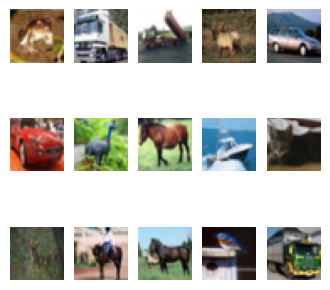

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4,4))
for i in range(15):
  plt.subplot(3,5,1+i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap = 'gray')

In [21]:
import numpy as np
# Predict the first 4 images of the test data
y_predictions = model1.predict(X_test[:4])

#y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)
# Convert the actual labels to class labels
actual_labels = numpy.argmax(y_test[:4], axis=1)

print("Predicted labels:", y_predictions)
print("Actual labels:   ", actual_labels)


1/1 [==============================] - 1s 892ms/step
Predicted labels: [3 8 8 0]
Actual labels:    [3 8 8 0]


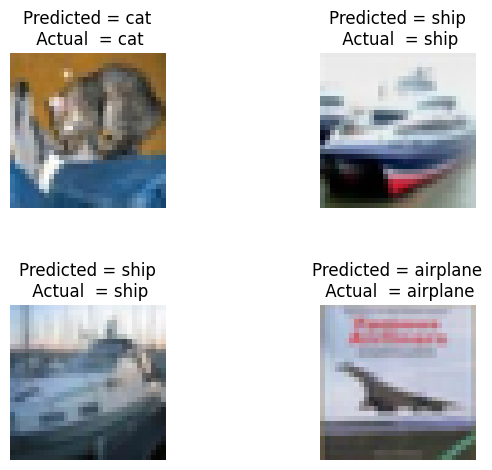

In [22]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (6,6))
axes = axes.ravel() #

for i in np.arange(0, 4):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[actual_labels[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train,test_size=0.2)

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
train_datagen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg19.preprocess_input,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    horizontal_flip = True
)
train_datagen.fit(x_train)

val_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg19.preprocess_input)
val_datagen.fit(x_val)

In [7]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [8]:
vgg_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
)

vgg_model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [9]:
model3 = tf.keras.Sequential()
model3.add(vgg_model)
model3.add(Flatten())
model3.add(Dense(1024, activation = 'relu'))
model3.add(Dense(1024, activation = 'relu'))
model3.add(Dense(256, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 21864266 (83.41 MB)
Trainable params: 2186

In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model3.compile(optimizer= optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [11]:
history2 = model3.fit(
    train_datagen.flow(x_train, y_train, batch_size = 128),
    validation_data = val_datagen.flow(x_val,y_val, batch_size = 128),
    epochs = 2,
    verbose = 1,
    callbacks = [learning_rate_reduction]
)

Epoch 1/2
313/313 [==============================] - 4537s 14s/step - loss: 2.3250 - accuracy: 0.1167 - val_loss: 2.3029 - val_accuracy: 0.0959 - lr: 0.0010
Epoch 2/2
313/313 [==============================] - 4564s 15s/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3028 - val_accuracy: 0.0959 - lr: 0.0010


In [33]:
x_test = tf.keras.applications.vgg19.preprocess_input(X_test)
y_pred = model3.predict(x_test)
y_pred[:10]

313/313 [==============================] - 132s 422ms/step


array([[0.09967172, 0.1009017 , 0.09947705, 0.09953134, 0.10033732,
        0.09950876, 0.09822493, 0.10236874, 0.09953794, 0.10044046],
       [0.09967172, 0.1009017 , 0.09947705, 0.09953134, 0.10033732,
        0.09950876, 0.09822493, 0.10236874, 0.09953794, 0.10044046],
       [0.09967172, 0.1009017 , 0.09947705, 0.09953134, 0.10033732,
        0.09950876, 0.09822493, 0.10236874, 0.09953794, 0.10044046],
       [0.09967172, 0.1009017 , 0.09947705, 0.09953134, 0.10033732,
        0.09950876, 0.09822493, 0.10236874, 0.09953794, 0.10044046],
       [0.09967172, 0.1009017 , 0.09947705, 0.09953134, 0.10033732,
        0.09950876, 0.09822493, 0.10236874, 0.09953794, 0.10044046],
       [0.09967172, 0.1009017 , 0.09947705, 0.09953134, 0.10033732,
        0.09950876, 0.09822493, 0.10236874, 0.09953794, 0.10044046],
       [0.09967172, 0.1009017 , 0.09947705, 0.09953134, 0.10033732,
        0.09950876, 0.09822493, 0.10236874, 0.09953794, 0.10044046],
       [0.09967172, 0.1009017 , 0.0994770

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

#print('Testing Accuarcy : ', accuracy_score(Y_test, y_pred))
y_pred1= np.argmax(y_pred, axis=1)

y_pred1 = y_pred1.reshape(10000,1)

print('Testing Accuarcy : ', accuracy_score(Y_test, y_pred1))

Testing Accuarcy :  0.1


Text(0, 0.5, 'Actual label')

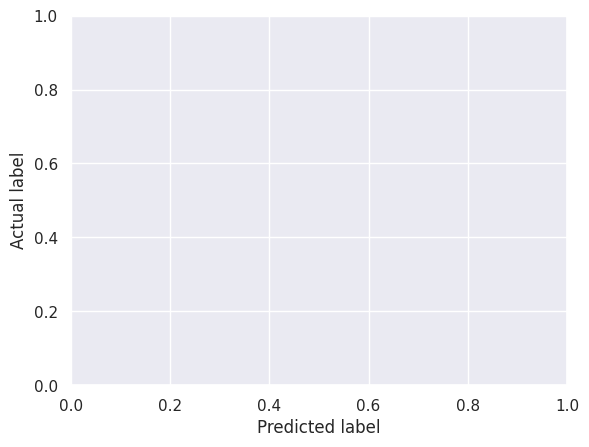

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

mat = confusion_matrix(Y_test, y_pred1)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

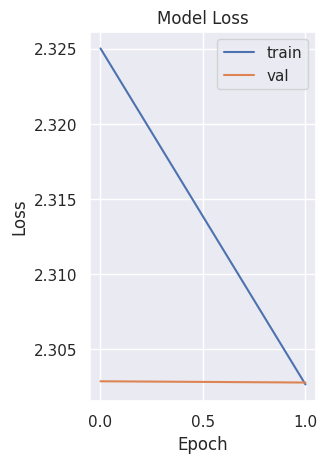

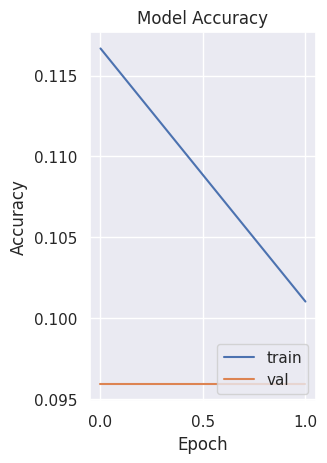

In [42]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
# Plot the training and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.subplot(1,2,2)
# Plot the training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
import numpy as np
# Predict the first 4 images of the test data
y_predictions1 = model1.predict(X_test[:4])

#y_predictions.reshape(-1,)
y_predictions1= np.argmax(y_predictions, axis=1)
# Convert the actual labels to class labels
actual_labels = numpy.argmax(y_test[:4], axis=1)

print("Predicted labels:", y_predictions1)
print("Actual labels:   ", actual_labels)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (6,6))
axes = axes.ravel() #

for i in np.arange(0, 4):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[actual_labels[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)